<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/NetworkAnalysis_inPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.0 MB 29.5 MB/s 
     |████████████████████████████████| 6.3 MB 51.1 MB/s 
     |████████████████████████████████| 11.2 MB 39.2 MB/s 
     |████████████████████████████████| 1.0 MB 41.4 MB/s 
     |████████████████████████████████| 16.7 MB 361 kB/s 
     |████████████████████████████████| 930 kB 42.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Download the OSM data from Kamppi but this time include only such street segments that are meant for cars by specifying 'drive' into network_type:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')

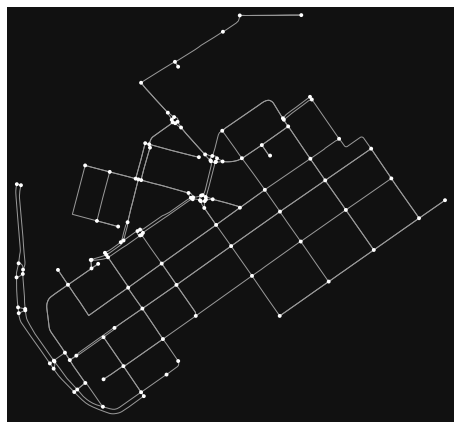

In [ ]:
#Plot the graph:
fig, ax = ox.plot_graph(graph)

Okey so now we have retrieved only such streets where it is possible to drive with a car. Let’s confirm this by taking a look at the attributes of the street network. Easiest way to do this is to convert the graph (nodes and edges) into GeoDataFrames.

Converting graph into a GeoDataFrame can be done with function graph_to_gdfs() that we already used in previous tutorial. With parameters nodes and edges, it is possible to control whether to retrieve both nodes and edges from the graph


In [ ]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [ ]:
# Check columns
edges.columns

In [ ]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
edges.head()

osmid  \
u        v          key                                                      
25216594 1372425714 0                                             23856784   
25238874 1372425713 0                                 [29977177, 30470347]   
25238944 25216594   0                                 [372440330, 8135861]   
         319896278  0            [25514547, 677423564, 30288797, 30288799]   
25291537 25291591   0    [30568275, 36729015, 316590744, 316590745, 316...   

                         oneway   lanes            name   highway maxspeed  \
u        v          key                                                      
25216594 1372425714 0      True       2  Mechelininkatu   primary       40   
25238874 1372425713 0      True       3  Mechelininkatu   primary       40   
25238944 25216594   0      True       2             NaN   primary       40   
         319896278  0      True  [2, 3]  Mechelininkatu   primary       40   
25291537 25291591   0      True     NaN   Fredrikinkatu  tertiary       30   

                          length  \
u        v          key            
25216594 1372425714 0     40.885   
25238874 1372425713 0     16.601   
25238944 25216594   0     25.190   
         319896278  0    242.476   
25291537 25291591   0    139.090   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 1372425713 0    LINESTRING (24.92103 60.16366, 24.92104 60.163...   
25238944 25216594   0    LINESTRING (24.92129 60.16463, 24.92127 60.164...   
         319896278  0    LINESTRING (24.92129 60.16463, 24.92136 60.164...   
25291537 25291591   0    LINESTRING (24.93702 60.16433, 24.93700 60.164...   

                        junction bridge access  
u        v          key                         
25216594 1372425714 0        NaN    NaN    NaN  
25238874 1372425713 0        NaN    NaN    NaN  
25238944 25216594   0        yes    NaN    NaN  
         319896278  0        NaN    NaN    NaN  
25291537 25291591   0        NaN    NaN    NaN

Let’s take a look what kind of features we have in the highway column:

In [ ]:
print(edges['highway'].value_counts())

residential      113
tertiary          78
primary           26
secondary         17
unclassified      10
living_street      4
primary_link       1
Name: highway, dtype: int64


Okey, now we can confirm that as a result our street network indeed only contains such streets where it is allowed to drive with a car as there are no e.g. cycleways or footways included in the data.

Let’s continue and find the shortest path between two points based on the distance. As the data is in WGS84 format, we should first reproject our data into a metric system. We can re-project the graph from latitudes and longitudes to an appropriate UTM zone using the project_graph() function from OSMnx.

Project the graph:

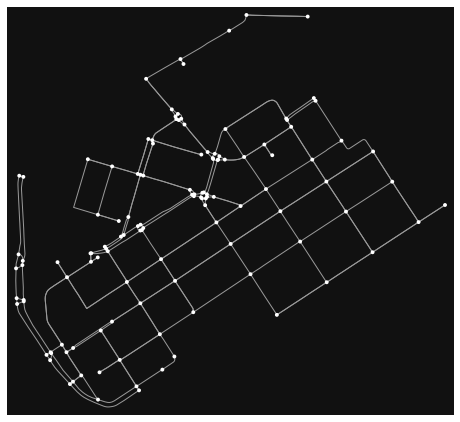

In [ ]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [ ]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:

print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [ ]:
edges_proj.head()

osmid  oneway  \
u          v          key                                                    
25216594   1372425714 0                                   23856784    True   
1372425714 25238874   0    [78537378, 8169098, 29081876, 78537375]    True   
           1372425718 0                                   29066052    True   
25238874   1372425713 0                       [29977177, 30470347]    True   
1372425713 568147264  0                                   57839670    True   

                            lanes            name   highway maxspeed  length  \
u          v          key                                                      
25216594   1372425714 0         2  Mechelininkatu   primary       40  40.885   
1372425714 25238874   0    [2, 3]  Mechelininkatu   primary       40  85.540   
           1372425718 0         2             NaN   primary       40  20.591   
25238874   1372425713 0         3  Mechelininkatu   primary       40  16.601   
1372425713 568147264  0       NaN    Itämerenkatu  tertiary       40  20.414   

                                                                    geometry  \
u          v          key                                                      
25216594   1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425714 25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   
           1372425718 0    LINESTRING (384624.179 6671539.986, 384627.284...   
25238874   1372425713 0    LINESTRING (384625.787 6671454.380, 384626.281...   
1372425713 568147264  0    LINESTRING (384627.187 6671437.809, 384646.250...   

                          junction bridge access  
u          v          key                         
25216594   1372425714 0        NaN    NaN    NaN  
1372425714 25238874   0        NaN    NaN    NaN  
           1372425718 0        yes    NaN    NaN  
25238874   1372425713 0        NaN    NaN    NaN  
1372425713 568147264  0        NaN    NaN    NaN

we can check the epsg code of this projection using pyproj

In [ ]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32635

# Analyzing the network properties
Now as we have seen some of the basic functionalities of OSMnx such as downloading the data and converting data from graph to GeoDataFrame, we can take a look some of the analytical features of omsnx. Osmnx includes many useful functionalities to extract information about the network.

In [ ]:
#To calculate some of the basic street network measures we can use basic_stats() function in OSMnx:

In [ ]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'circuity_avg': 1.023868048158287,
 'edge_length_avg': 80.27632530120486,
 'edge_length_total': 19988.80500000001,
 'intersection_count': 116,
 'k_avg': 4.016129032258065,
 'm': 249,
 'n': 124,
 'self_loop_proportion': 0.0,
 'street_length_avg': 74.69278142076502,
 'street_length_total': 13668.778999999999,
 'street_segment_count': 183,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194}}

to be able to extract the more advanced statistics (and some of the missing ones above) from the street network, it is required to have information about the coverage area of the network. Let’s calculate the area of the convex hull of the street network and see what we can get.

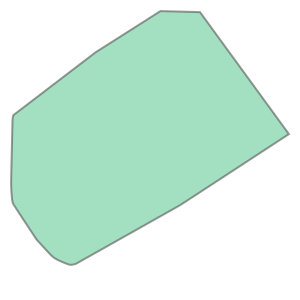

In [ ]:

# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [ ]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                    124
m                                                                                    249
k_avg                                                                           4.016129
edge_length_total                                                              19988.805
edge_length_avg                                                                80.276325
streets_per_node_avg                                                            3.217742
streets_per_node_counts                                 {0: 0, 1: 8, 2: 1, 3: 71, 4: 44}
streets_per_node_proportions           {0: 0.0, 1: 0.06451612903225806, 2: 0.00806451...
intersection_count                                                                   116
street_length_total                                                            13668.779
street_segment_count                                                                 183
street_length_avg    

#Shortest path analysis
Let’s now calculate the shortest path between two points using the shortest path function in Networkx. First we need to specify the source and target locations for our route. Let’s use the centroid of our network as the source location and the furthest point in East in our network as the target location.

In [ ]:

#Let’s first determine the centroid of our network. We can take advantage of the same Convex Hull that we used previously to determine the centroid of our data.

# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

In [ ]:
#Let's now find the easternmost node in our street network. We can do this based on the x coordinates of the nodes:

#Let’s find out which node has the largest x-coordinate value. First, let’s ensure that the values are floats:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float)
# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)
#Let’s retrieve the target Point having the largest x-coordinate. We can do this by using the .loc function of Pandas that we have used already many times in earlier tutorials.
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

In [ ]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

In [ ]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node

In [ ]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node

In [ ]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

In [ ]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

Now we are ready to do the routing and find the shortest path between the origin and target locations by using the shortest_path() function of networkx. With weight -parameter we can specify that 'length' attribute should be used as the cost impedance in the routing. If specifying the weight parameter, NetworkX will use by default Dijkstra’s algorithm to find the optimal route. We need to specify the graph that is used for routing, and the origin ID (source) and the target ID in between the shortest path will be calculated:

In [ ]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=target_xy)

#Saving shortest paths to disk
Quite often you need to save the route e.g. as a Shapefile. Hence, let’s continue still a bit and see how we can make a Shapefile of our route with some information associated with it.

First we need to get the nodes that belong to the shortest path:

In [ ]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

In [ ]:
#Now we can create a LineString out of the Point geometries of the nodes:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [ ]:
#Let's make a GeoDataFrame out of it having some useful information about our route such as a list of the osmids that are part of the route and the length of the route.

# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

In [ ]:
# Retrieve buildings and reproject
buildings = ox.footprints_from_place(place_name)
buildings_proj = buildings.to_crs(crs=edges_proj.crs)


#Let’s now plot the route and the street network elements to verify that everything is as it should:
# Plot edges and nodes
ax = edges_proj.plot(linewidth=0.75, color='gray')
ax = nodes_proj.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=24, color='green')

In [ ]:
#As there are certain columns with such data values that Shapefile format does not support (such as list or boolean), we need to convert those into strings to be able to export the data to Shapefile:

# Columns with invalid values
invalid_cols = ['lanes', 'maxspeed', 'name', 'oneway', 'osmid']

# Iterate over invalid columns and convert them to string format
for col in invalid_cols:
    edges_proj[col] = edges_proj[col].astype(str)

print(edges_proj.dtypes)

In [ ]:
import os

# Parse the place name for the output file names (replace spaces with underscores and remove commas)
place_name_out = place_name.replace(' ', '_').replace(',','')

# Output directory
out_dir = "data"

# Parse output file paths
streets_out = os.path.join(out_dir, "%s_streets.shp" % place_name_out)
route_out = os.path.join(out_dir, "Route_from_a_to_b_at_%s.shp" % place_name_out)
nodes_out = os.path.join(out_dir, "%s_nodes.shp" % place_name_out)
buildings_out = os.path.join(out_dir, "%s_buildings.shp" % place_name_out)
od_out = os.path.join(out_dir, "%s_route_OD_points.shp" % place_name_out)

# Save files
edges_proj.to_file(streets_out)
route_geom.to_file(route_out)
nodes_proj.to_file(nodes_out)
od_nodes.to_file(od_out)
buildings[['geometry', 'name', 'addr:street']].to_file(buildings_out)

In [ ]:
#https://automating-gis-processes.github.io/site/notebooks/L6/network-analysis.html